<a href="https://colab.research.google.com/github/sayam47/Mellowmax-RL/blob/master/Paper_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

In [0]:
def env(action):
    if(action==0):
        s = np.random.choice(2,p=[0.66,0.34])
        if s:
            return 0,1
        else:
            return 0.122,0
    else:
        s = np.random.choice(2,p=[0.99,0.01])
        if s:
            return 0,1
        else:
            return 0.033,0

In [0]:
SOFTMAX = 1
MAX = 0
class Policy():
    def __init__(self, s_size=2, a_size=2,omega = 16.55):
        self.a_size=a_size
        self.s_size=s_size
        self.omega = omega
        self.beta = 16.55
        self.Q=np.zeros((s_size,a_size))
        
    def mellowmax(self ,beta):
        c = np.max(self.Q[0])
        mm = c + np.log((1/self.a_size)*np.sum(np.exp(self.omega * (self.Q[0] - c ))))/self.omega
        b = 0
        for a in self.Q[0]:
            b+=np.exp(beta * (a-mm))*(a-mm)
        return b
        
    def forward(self):
        if MAX:
            p=[0,0]
            p[np.argmax(self.Q[0])] = 1
            return p
        if SOFTMAX:
            beta = self.beta
        else:
            beta=optimize.brentq(self.mellowmax,-400,400)
        self.beta = beta
        k = np.exp(beta*self.Q[0])/np.sum(np.exp(beta*self.Q[0]))
        return k
    
    def act(self, state,maxi = 0):
        probs = self.forward()
        action = np.random.choice(len(probs), p=probs) # option 1: stochastic policy
        if maxi:
            action = np.argmax(self.Q[0])
        return action

In [5]:
MAX = 0
SOFTMAX = 1
policy = Policy()
policy.omega=600
policy.beta=17.05
qa=[]
qb=[]
psf1=[]
psf2=[]

def Paper(n_episodes=2000, gamma=0.98,alpha=0.1, print_every=500):
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = 0
        action = policy.act(state)
        
        while(1):
            reward,state1 = env(action)
            rewards.append(reward)
            action1=policy.act(state1)
            policy.Q[state][action]+=alpha*(reward+gamma*policy.Q[state1][action1]-policy.Q[state][action])
            if state1==1:
                break
            state=state1
            action=action1
        r=policy.forward()
        psf1.append(r[0])
        psf2.append(r[1])
        qa.append(policy.Q[0][0])
        qb.append(policy.Q[0][1])
        if i_episode%print_every==0:
            print(i_episode )
            
Paper()

500
1000
1500
2000


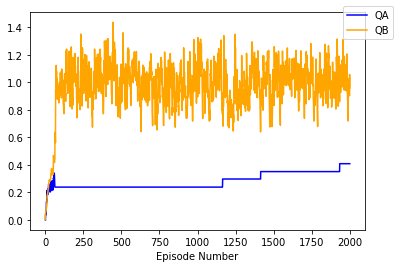

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(qa)+1), qa , label = 'QA' , color = 'blue')
plt.plot(np.arange(1, len(qb)+1), qb , label = "QB" , color = 'orange')
plt.xlabel('Episode Number')
plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.show()
plt.savefig('fig3.1.png')

In [0]:
def pro(state , action , state1):
    if state == 0:
        if action == 0:
            if state1 == 0:
                return 0.66
            else:
                return 0.34
        else:
            if state1 == 0:
                return 0.99
            else:
                return 0.01
    return -1

def re(action):
    if action == 0:
        return 0.122
    else:
        return 0.033
    
def GVI_Sarsa(policy , gamma=0.98,alpha=1,print_every=100 , delta = 1e-5):
        i_episode = 0
        while 1:
            diff = 0
            for action in range(2):
                Q_temp = policy.Q[0][action]
    #             reward , state = env(action)
                policy.Q[0][action] = alpha * (re(action) + gamma * (pro(0 , action , 0) * np.dot(policy.forward(),policy.Q[0].T)))
                diff = max(diff , abs(policy.Q[0][action]-Q_temp))        
            if diff<delta:
                break
            i_episode = i_episode + 1        
            qa1.append(policy.Q[0][0])
            qb1.append(policy.Q[0][1])
            r=policy.forward()
            psf1.append(r[0])
            psf2.append(r[1])
#             if i_episode%100==0:
#                 print(i_episode , policy_sarsa.beta)
        return i_episode



In [8]:
MAX = 0
SOFTMAX = 1
qa1=[]
qb1=[]
psf1 = []
psf2 = []
fir=[]
sec=[]
beta = 17
for b in range(100):
    policy_sarsa = Policy()
    policy_sarsa.beta = beta + b*0.002
    policy_sarsa.omega = beta + b*5
    GVI_Sarsa(policy_sarsa)
    fir.append(policy_sarsa.Q[0][0])
    sec.append(policy_sarsa.Q[0][1])
    print(b,policy_sarsa.Q[0],policy_sarsa.beta)

0 [0.51345383 0.62018024] 17.0
1 [0.51386354 0.6207948 ] 17.002
2 [0.51428034 0.62142   ] 17.004
3 [0.51470462 0.62205642] 17.006
4 [0.51514346 0.62271467] 17.008
5 [0.51559067 0.62338549] 17.01
6 [0.51605343 0.62407963] 17.012
7 [0.51653232 0.62479796] 17.014
8 [0.51702132 0.62553146] 17.016
9 [0.51753445 0.62630116] 17.018
10 [0.51805924 0.62708833] 17.02
11 [0.51860324 0.62790432] 17.022
12 [0.51916749 0.62875071] 17.024
13 [0.51975987 0.62963926] 17.026
14 [0.5203751  0.63056212] 17.028
15 [0.5210215  0.63153171] 17.03
16 [0.521701   0.63255095] 17.032
17 [0.52241594 0.63362337] 17.034
18 [0.52317585 0.63476322] 17.036
19 [0.52399094 0.63598585] 17.038
20 [0.52487242 0.63730808] 17.04
21 [0.52583296 0.63874889] 17.042
22 [0.52688743 0.64033058] 17.044
23 [0.52808762 0.64213087] 17.046
24 [0.52948536 0.64422747] 17.048
25 [0.53121998 0.6468294 ] 17.05
26 [0.53370597 0.65055837] 17.052
27 [0.69635314 0.89452923] 17.054
28 [0.69663564 0.89495298] 17.056
29 [0.69692273 0.89538362] 17.0

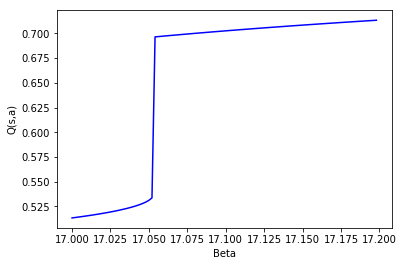

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(17,17.2,0.002),fir,color = 'blue')
plt.ylabel('Q(s,a)')
plt.xlabel('Beta')
# plt.show()
plt.savefig('Q_a_beta.png')

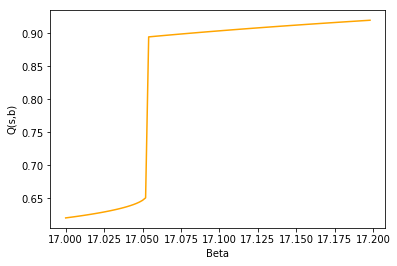

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(17,17.2,0.002),sec,color = 'orange')
plt.ylabel('Q(s,b)')
plt.xlabel('Beta')
# plt.show()
plt.savefig('Q_b_beta.png')

In [0]:
MAX = 0
SOFTMAX = 0
qa1=[]
qb1=[]
psf1 = []
psf2 = []
    
fir=[]
sec=[]
beta = 15
for b in range(100):
    policy_sarsa = Policy()
    policy_sarsa.beta = beta + b*0.002
    policy_sarsa.omega = beta + b*5
    GVI_Sarsa(policy_sarsa)
    fir.append(policy_sarsa.Q[0][0])
    sec.append(policy_sarsa.Q[0][1])
#     print(b,policy_sarsa.Q[0])

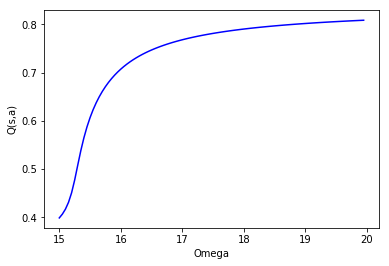

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(15,20,0.05),fir,color = 'blue')
plt.ylabel('Q(s,a)')
plt.xlabel('Omega')
# plt.show()
plt.savefig('Q_a_omega.png')

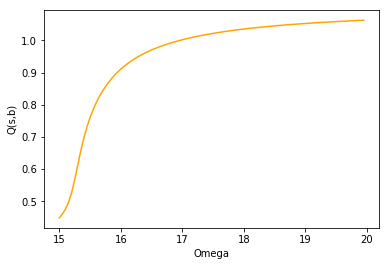

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(15,20,0.05),sec,color = 'orange')
plt.ylabel('Q(s,b)')
plt.xlabel('Omega')
# plt.show()
plt.savefig('Q_b_omega.png')

In [0]:
beta_list =  np.arange(1,40,0.05)

In [0]:
MAX = 1

num_iter_max = []

for b in beta_list:
    policy = Policy()
    policy.beta = b
    i = GVI_Sarsa(policy)
    num_iter_max.append(i)

In [16]:
MAX = 0
SOFTMAX = 1
num_iter_boltz = []
for b in beta_list:
    policy = Policy()
    policy.beta = b
    i = GVI_Sarsa(policy)
    num_iter_boltz.append(i)
    if i>1000:
        print(i , b)

1432 17.050000000000015
2444 17.100000000000016
1845 17.150000000000013
1554 17.200000000000014
1371 17.250000000000014
1242 17.300000000000015
1145 17.350000000000016
1069 17.400000000000013
1006 17.450000000000014


In [0]:
MAX = 0
SOFTMAX = 0
num_iter_mellow = []
for b in beta_list:
    policy = Policy()
    policy.omega = b
    i = GVI_Sarsa(policy)
    num_iter_mellow.append(i)

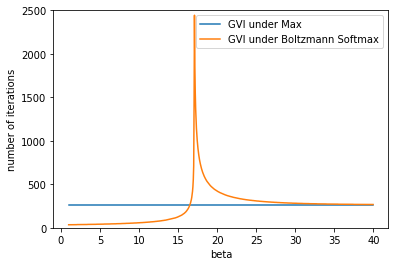

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(beta_list, num_iter_max , label = 'GVI under Max')
plt.plot(beta_list, num_iter_boltz , label = "GVI under Boltzmann Softmax")
plt.ylim(0, 2500)
plt.xlabel('beta')
plt.ylabel('number of iterations')
plt.legend()
# plt.show()
plt.savefig('it_max_b.png')

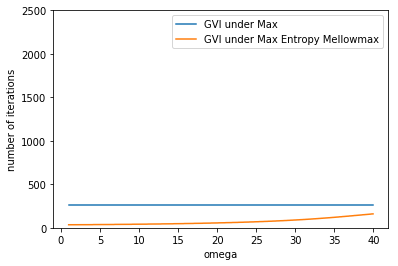

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(beta_list, num_iter_max , label = 'GVI under Max')
plt.plot(beta_list, num_iter_mellow , label = "GVI under Max Entropy Mellowmax")
plt.ylim(0, 2500)
plt.xlabel('omega')
plt.ylabel('number of iterations')
plt.legend()
# plt.show()
plt.savefig('it_max_mellow.png')